<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## <Coloque aqui o Título da Análise>

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Arthur Wypych de Almeida, 19.00565-2' #@param {type:"string"}
Aluno2 = 'Luiz Fernando Rodrigues, 19.01358-2' #@param {type:"string"}





# **Resumo (*Abstract*)**

Este projeto tem como objetivo realizar uma análise dos dados de óbitos do SUS no Brasil dos anos de 2016 a 2022 na região Sudeste. A análise visa identificar padrões e tendências nos dados de mortalidade, proporcionando uma visão mais clara e objetiva sobre a eficiência do SUS. Ao compreender melhor esses dados, podemos destacar tópicos importantes que necessitam de atenção, facilitando a tomada de decisões que contribuam para a melhoria contínua do sistema de saúde. Com essa abordagem, esperamos fornecer insights valiosos que possam orientar a formulação de políticas públicas e estratégias de saúde mais eficazes, visando a promoção de um sistema de saúde mais eficiente.

# **Introdução**

A análise de dados de mortalidade é crucial para entender a saúde pública em qualquer região. Com a pandemia de COVID-19, a relevância dessa análise aumentou significativamente, pois destaca áreas que necessitam de intervenção imediata. Além disso, a análise contínua dos dados do SUS ajuda a monitorar a eficiência das políticas de saúde implementadas e ajustar estratégias conforme necessário.

Este projeto é importante pois mostra que os dados podem trazer informações valiosas que proporcionam muitas vantagens, como melhorar a alocação de recursos de saúde, ajudar na criação de políticas públicas mais eficazes, reduzir as taxas de mortalidade por intervenções direcionadas, entre outras.

# **Descrição e origem dos dados**

Utilizamos a biblioteca Pysus para acessar os dados do Sistema de Informação sobre Mortalidade (SIM). Este sistema contém diversas bases de dados, cada uma correspondente a diferentes estados e anos, e fornece informações sobre as incidências de internações no SUS que resultaram em óbitos.








In [1]:
!pip install pysus

# **Aquisição e Preparação dos dados**

Selecionamos apenas dados dos Estados da região Sudeste do Brasil a partir de 2016 devido ao tamanho dos arquivos. Obter dados de mais Estados ou de anos anteriores causam erro pois utiliza toda a RAM do sistema.








In [2]:
import pandas as pd
import numpy as np

In [3]:
from pysus.online_data.SIM import get_CID9_table, get_CID10_table, get_municipios, get_ocupations

In [4]:
from pysus.ftp.databases.sim import SIM
from pysus.preprocessing.decoders import translate_variables_SIM
from pysus.preprocessing.SIM import group_and_count, redistribute_missing, redistribute_cid_chapter

sim = SIM().load()

In [5]:
df_sp_2016 = sim.download(sim.get_files("CID10",'sp',2016)).to_dataframe()
df_sp_2017 = sim.download(sim.get_files("CID10",'sp',2017)).to_dataframe()
df_sp_2018 = sim.download(sim.get_files("CID10",'sp',2018)).to_dataframe()
df_sp_2019 = sim.download(sim.get_files("CID10",'sp',2019)).to_dataframe()
df_sp_2020 = sim.download(sim.get_files("CID10",'sp',2020)).to_dataframe()
df_sp_2021 = sim.download(sim.get_files("CID10",'sp',2021)).to_dataframe()
df_sp_2022 = sim.download(sim.get_files("CID10",'sp',2022)).to_dataframe()

100%|██████████| 30.8M/30.8M [00:00<00:00, 7.20GB/s]
100%|██████████| 29.5M/29.5M [00:00<00:00, 8.33GB/s]
100%|██████████| 23.3M/23.3M [00:00<00:00, 6.19GB/s]
100%|██████████| 24.1M/24.1M [00:00<00:00, 160MB/s]
100%|██████████| 28.7M/28.7M [00:00<00:00, 7.81GB/s]
100%|██████████| 34.3M/34.3M [00:00<00:00, 8.29GB/s]
100%|██████████| 28.6M/28.6M [00:00<00:00, 8.59GB/s]


In [6]:
df_rj_2016 = sim.download(sim.get_files("CID10",'rj',2016)).to_dataframe()
df_rj_2017 = sim.download(sim.get_files("CID10",'rj',2017)).to_dataframe()
df_rj_2018 = sim.download(sim.get_files("CID10",'rj',2018)).to_dataframe()
df_rj_2019 = sim.download(sim.get_files("CID10",'rj',2019)).to_dataframe()
df_rj_2020 = sim.download(sim.get_files("CID10",'rj',2020)).to_dataframe()
df_rj_2021 = sim.download(sim.get_files("CID10",'rj',2021)).to_dataframe()
df_rj_2022 = sim.download(sim.get_files("CID10",'rj',2022)).to_dataframe()

100%|██████████| 14.5M/14.5M [00:00<00:00, 2.89GB/s]
100%|██████████| 14.1M/14.1M [00:00<00:00, 2.61GB/s]
100%|██████████| 10.9M/10.9M [00:00<00:00, 2.18GB/s]
100%|██████████| 11.3M/11.3M [00:00<00:00, 2.04GB/s]
100%|██████████| 13.8M/13.8M [00:00<00:00, 1.92GB/s]
100%|██████████| 15.0M/15.0M [00:00<00:00, 3.90GB/s]
100%|██████████| 11.9M/11.9M [00:00<00:00, 3.38GB/s]


In [7]:
df_mg_2016 = sim.download(sim.get_files("CID10",'mg',2016)).to_dataframe()
df_mg_2017 = sim.download(sim.get_files("CID10",'mg',2017)).to_dataframe()
df_mg_2018 = sim.download(sim.get_files("CID10",'mg',2018)).to_dataframe()
df_mg_2019 = sim.download(sim.get_files("CID10",'mg',2019)).to_dataframe()
df_mg_2020 = sim.download(sim.get_files("CID10",'mg',2020)).to_dataframe()
df_mg_2021 = sim.download(sim.get_files("CID10",'mg',2021)).to_dataframe()
df_mg_2022 = sim.download(sim.get_files("CID10",'mg',2022)).to_dataframe()

100%|██████████| 14.2M/14.2M [00:00<00:00, 4.01GB/s]
100%|██████████| 13.8M/13.8M [00:00<00:00, 2.68GB/s]
100%|██████████| 10.9M/10.9M [00:00<00:00, 1.95GB/s]
100%|██████████| 11.2M/11.2M [00:00<00:00, 2.25GB/s]
100%|██████████| 12.7M/12.7M [00:00<00:00, 3.41GB/s]
100%|██████████| 14.9M/14.9M [00:00<00:00, 3.64GB/s]
100%|██████████| 13.0M/13.0M [00:00<00:00, 3.40GB/s]


In [8]:
df_es_2016 = sim.download(sim.get_files("CID10",'es',2016)).to_dataframe()
df_es_2017 = sim.download(sim.get_files("CID10",'es',2017)).to_dataframe()
df_es_2018 = sim.download(sim.get_files("CID10",'es',2018)).to_dataframe()
df_es_2019 = sim.download(sim.get_files("CID10",'es',2019)).to_dataframe()
df_es_2020 = sim.download(sim.get_files("CID10",'es',2020)).to_dataframe()
df_es_2021 = sim.download(sim.get_files("CID10",'es',2021)).to_dataframe()
df_es_2022 = sim.download(sim.get_files("CID10",'es',2022)).to_dataframe()

100%|██████████| 2.41M/2.41M [00:00<00:00, 448MB/s]
100%|██████████| 2.52M/2.52M [00:00<00:00, 770MB/s]
100%|██████████| 1.97M/1.97M [00:00<00:00, 486MB/s]
100%|██████████| 2.06M/2.06M [00:00<00:00, 191MB/s]
100%|██████████| 2.40M/2.40M [00:00<00:00, 522MB/s]
100%|██████████| 2.63M/2.63M [00:00<00:00, 443MB/s]
100%|██████████| 2.25M/2.25M [00:00<00:00, 401MB/s]


In [9]:
# sp
df_sp_2016['ESTADO'] = 'São Paulo'
df_sp_2016['ANO'] = 2016
df_sp_2017['ESTADO'] = 'São Paulo'
df_sp_2017['ANO'] = 2017
df_sp_2018['ESTADO'] = 'São Paulo'
df_sp_2018['ANO'] = 2018
df_sp_2019['ESTADO'] = 'São Paulo'
df_sp_2019['ANO'] = 2019
df_sp_2020['ESTADO'] = 'São Paulo'
df_sp_2020['ANO'] = 2020
df_sp_2021['ESTADO'] = 'São Paulo'
df_sp_2021['ANO'] = 2021
df_sp_2022['ESTADO'] = 'São Paulo'
df_sp_2022['ANO'] = 2022

# rj
df_rj_2016['ESTADO'] = 'Rio de Janeiro'
df_rj_2016['ANO'] = 2016
df_rj_2017['ESTADO'] = 'Rio de Janeiro'
df_rj_2017['ANO'] = 2017
df_rj_2018['ESTADO'] = 'Rio de Janeiro'
df_rj_2018['ANO'] = 2018
df_rj_2019['ESTADO'] = 'Rio de Janeiro'
df_rj_2019['ANO'] = 2019
df_rj_2020['ESTADO'] = 'Rio de Janeiro'
df_rj_2020['ANO'] = 2020
df_rj_2021['ESTADO'] = 'Rio de Janeiro'
df_rj_2021['ANO'] = 2021
df_rj_2022['ESTADO'] = 'Rio de Janeiro'
df_rj_2022['ANO'] = 2022

# mg
df_mg_2016['ESTADO'] = 'Minas Gerais'
df_mg_2016['ANO'] = 2016
df_mg_2017['ESTADO'] = 'Minas Gerais'
df_mg_2017['ANO'] = 2017
df_mg_2018['ESTADO'] = 'Minas Gerais'
df_mg_2018['ANO'] = 2018
df_mg_2019['ESTADO'] = 'Minas Gerais'
df_mg_2019['ANO'] = 2019
df_mg_2020['ESTADO'] = 'Minas Gerais'
df_mg_2020['ANO'] = 2020
df_mg_2021['ESTADO'] = 'Minas Gerais'
df_mg_2021['ANO'] = 2021
df_mg_2022['ESTADO'] = 'Minas Gerais'
df_mg_2022['ANO'] = 2022

# es
df_es_2016['ESTADO'] = 'Espírito Santo'
df_es_2016['ANO'] = 2016
df_es_2017['ESTADO'] = 'Espírito Santo'
df_es_2017['ANO'] = 2017
df_es_2018['ESTADO'] = 'Espírito Santo'
df_es_2018['ANO'] = 2018
df_es_2019['ESTADO'] = 'Espírito Santo'
df_es_2019['ANO'] = 2019
df_es_2020['ESTADO'] = 'Espírito Santo'
df_es_2020['ANO'] = 2020
df_es_2021['ESTADO'] = 'Espírito Santo'
df_es_2021['ANO'] = 2021
df_es_2022['ESTADO'] = 'Espírito Santo'
df_es_2022['ANO'] = 2022

In [10]:
df = pd.concat([df_sp_2016, df_sp_2017, df_sp_2018, df_sp_2019, df_sp_2020, df_sp_2021, df_sp_2022,
                df_rj_2016, df_rj_2017, df_rj_2018, df_rj_2019, df_rj_2020, df_rj_2021, df_rj_2022,
                df_mg_2016, df_mg_2017, df_mg_2018, df_mg_2019, df_mg_2020, df_mg_2021, df_mg_2022,
                df_es_2016, df_es_2017, df_es_2018, df_es_2019, df_es_2020, df_es_2021, df_es_2022],
                ignore_index=True)

In [16]:
df['SEXO'] = df['SEXO'].astype('object')

In [ ]:
variables = ['CODMUNRES','SEXO','IDADE_ANOS','CID10_CHAPTER']

df = translate_variables_SIM(
    df,
    age_classes=True,
    classify_cid10_chapters=True,
)

In [ ]:
counts = group_and_count(df,variables)
counts["COUNTS_ORIGINAL"] = counts["COUNTS"]
nan_string = 'missing'

In [ ]:
counts = redistribute_missing(counts,['CODMUNRES','SEXO','IDADE_ANOS'],nan_string=nan_string)
counts[counts["COUNTS"] > 1]

In [18]:
import re

df.dropna(subset=['DTOBITO'], inplace=True)
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

def extrai_idade(intervalo):
    match = re.match(r'\[(\d+\.?\d*)', intervalo)
    if match:
        return float(match.group(1))
    return None

df['IDADE'] = df['IDADE_ANOS'].astype(str).apply(extrai_idade)

df[['DTCADASTRO', 'DTOBITO', 'IDADE_ANOS', 'IDADE']]

,DTCADASTRO,DTOBITO,IDADE_ANOS,IDADE
0,12012016,2016-01-01,"[48.0, 49.0)",48.0
1,12012016,2016-01-01,"[44.0, 45.0)",44.0
2,04012016,2016-01-01,"[40.0, 41.0)",40.0
3,05012016,2016-01-01,"[55.0, 56.0)",55.0
4,04012016,2016-01-01,"[75.0, 76.0)",75.0
...,...,...,...,...
4349890,17092022,2022-08-17,"[90.0, inf)",90.0
4349891,29082022,2022-08-22,"[90.0, inf)",90.0
4349892,18102022,2022-10-14,"[39.0, 40.0)",39.0
4349893,29082022,2022-08-25,"[74.0, 75.0)",74.0


# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Q1. Qual é a participação de cada Estado na taxa de mortalidade da Região Sudeste?

Por ordem de maior mortalidade temos São Paulo (50,2%), Rio de Janeiro (23,1%), Minas Gerais (22,7%) e Espírito Santo (4,0%).

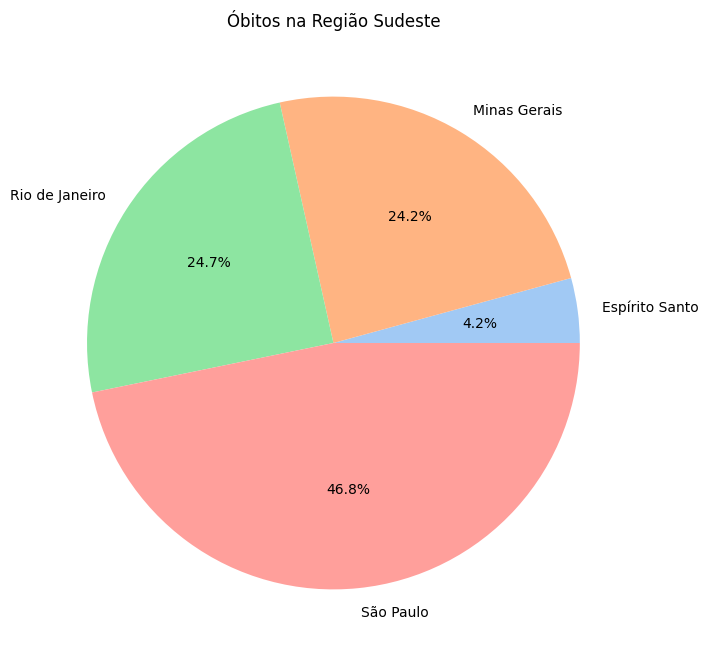

In [13]:
Obitos_Estado = df.groupby('ESTADO').size().reset_index(name='total_obitos')

plt.figure(figsize=(10, 8))
plt.pie(Obitos_Estado['total_obitos'], labels=Obitos_Estado['ESTADO'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Óbitos na Região Sudeste')
plt.show()

### **Conclusão**

São Paulo representa mais de 50% dos casos de óbito da região Sudeste. Rio de janeiro, apesar de ter uma população menor do que Minas Gerais, tem uma taxa de óbitos maior.

## **Q2.** Podemos observar os efeitos do COVID-19 sendo refletidos nos dados de óbitos no SUS?

Podemos observar uma crescente nos casos de óbitos em todos os Estados a partir de 2019 que só voltaram a cair em 2022.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

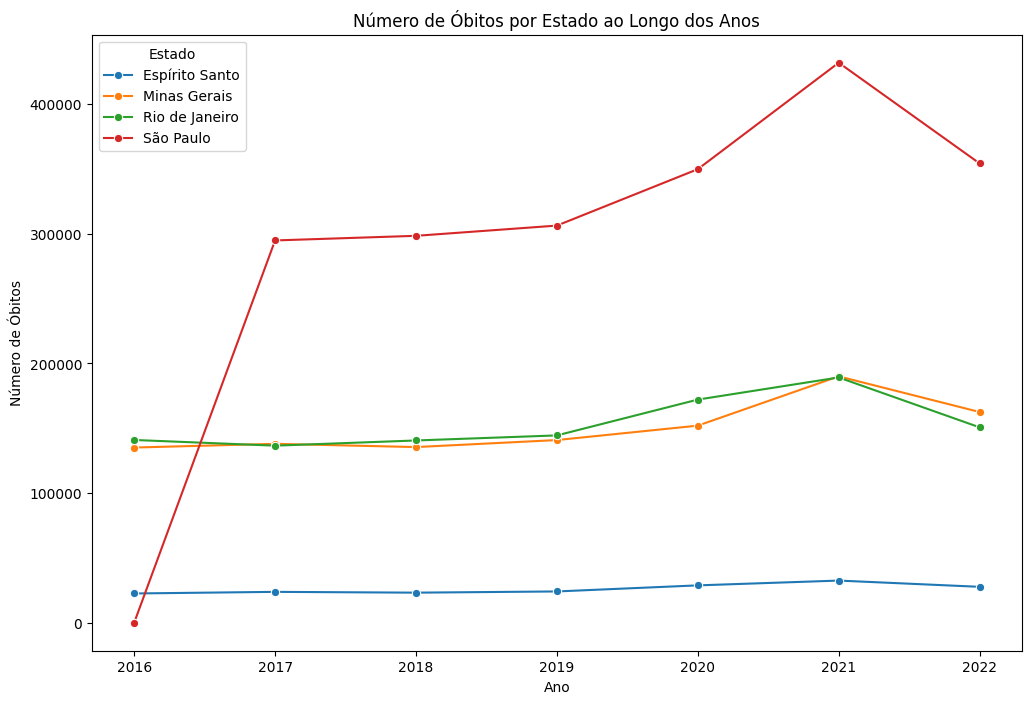

In [21]:
df_counts = df.groupby(['ESTADO', 'ANO']).size().reset_index(name='obitos')

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_counts, x='ANO', y='obitos', hue='ESTADO', marker='o')

plt.title('Número de Óbitos por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.legend(title='Estado')

plt.show()

### **Conclusão**

Sim, durante o período da pandemia (2020-2022) os óbitos no SUS cresceram expressivamente em todos os Estados analisados. Isso ocorre tanto pela letalidade do vírus quanto pelos problemas de superlotação que o SUS enfrentou nesse período.

## **Q3.** Quais Estados tiveram, proporcionalmente, maiores e menores índices de óbitos no período?

São Paulo teve um pico de óbitos mais expressivo do que os outros Estados. Rio de Janeiro teve menor pico e maior redução de casos de óbitos pós pico.

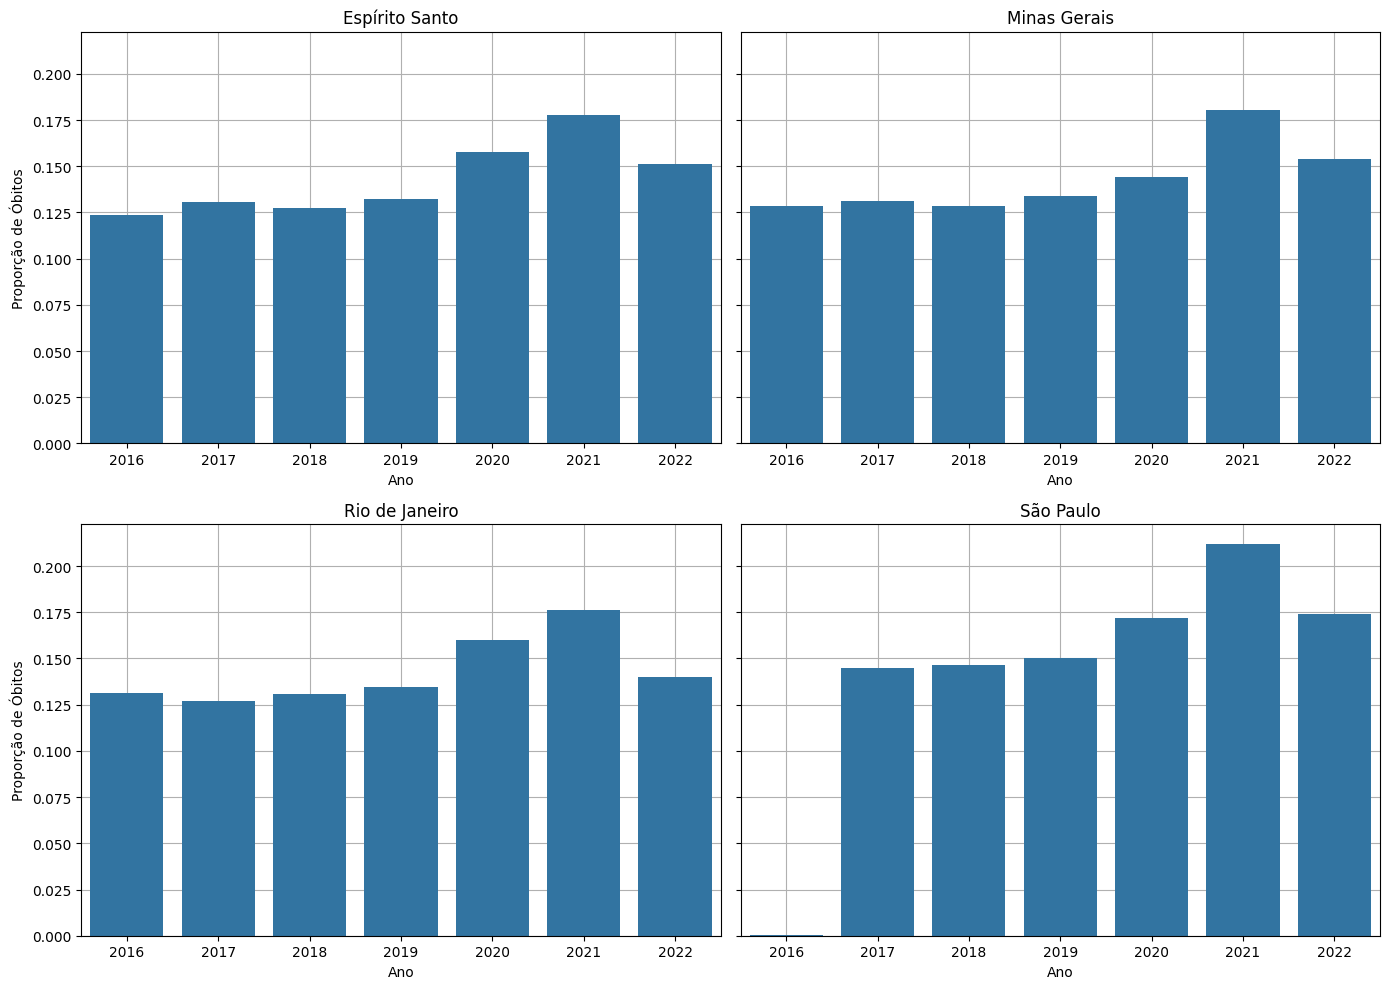

In [16]:
total_obitos = df_counts.groupby('ESTADO')['obitos'].transform('sum')

df_counts['obitos_normalized'] = df_counts['obitos'] / total_obitos

states_to_plot = df_counts['ESTADO'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

axes = axes.flatten()

for i, estado in enumerate(states_to_plot):
    state_data = df_counts[df_counts['ESTADO'] == estado]
    sns.barplot(ax=axes[i], x='ANO', y='obitos_normalized', data=state_data, zorder=2)
    axes[i].set_title(estado)
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Proporção de Óbitos')
    axes[i].grid(True, zorder=1)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

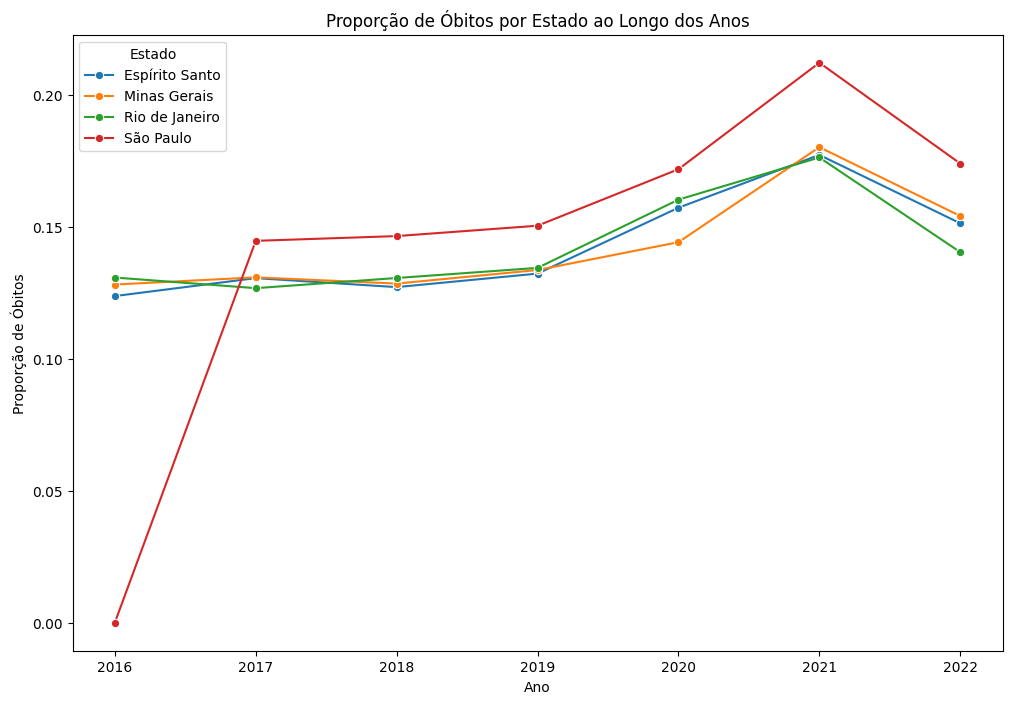

In [22]:
df_counts = df.groupby(['ESTADO', 'ANO']).size().reset_index(name='obitos')

total_obitos_por_estado = df_counts.groupby('ESTADO')['obitos'].sum().reset_index(name='total_obitos')

df_counts = pd.merge(df_counts, total_obitos_por_estado, on='ESTADO')

df_counts['proporcao_obitos'] = df_counts['obitos'] / df_counts['total_obitos']

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_counts, x='ANO', y='proporcao_obitos', hue='ESTADO', marker='o')

plt.title('Proporção de Óbitos por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Óbitos')
plt.legend(title='Estado')

plt.show()

### **Conclusão**

Podemos observar que São Paulo, apesar de ter o maior pico de óbitos por causa da pandemia, conseguiu se recuperar de forma similar aos outros Estados; já o Rio de Janeiro, além de ter tido o menor pico, foi o Estado que melhor se recuperou e, em 2022, teve uma taxa de óbitos menor que qualquer outro Estado da região, o que pode indicar possivelmente melhor eficiência no tratamento dos pacientes.

In [26]:
df[(df['ANO'] == 2016) & (df['ESTADO'] == 'SP')]

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,ESTADO,ANO,IDADE_ANOS,faixa_etaria


## **Q4.** Houve alguma discrepância no tempo de internação médio entre os Estados?

São Paulo e Minas Gerais tiveram um tempo de internação médio menor do que os outros Estados. Rio de Janeiro teve o maior tempo de internação.

<ipython-input-18-53611f0e34f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ESTADO', y='DIFDATA', data=mean_difdata_by_state, palette='viridis', zorder=2)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

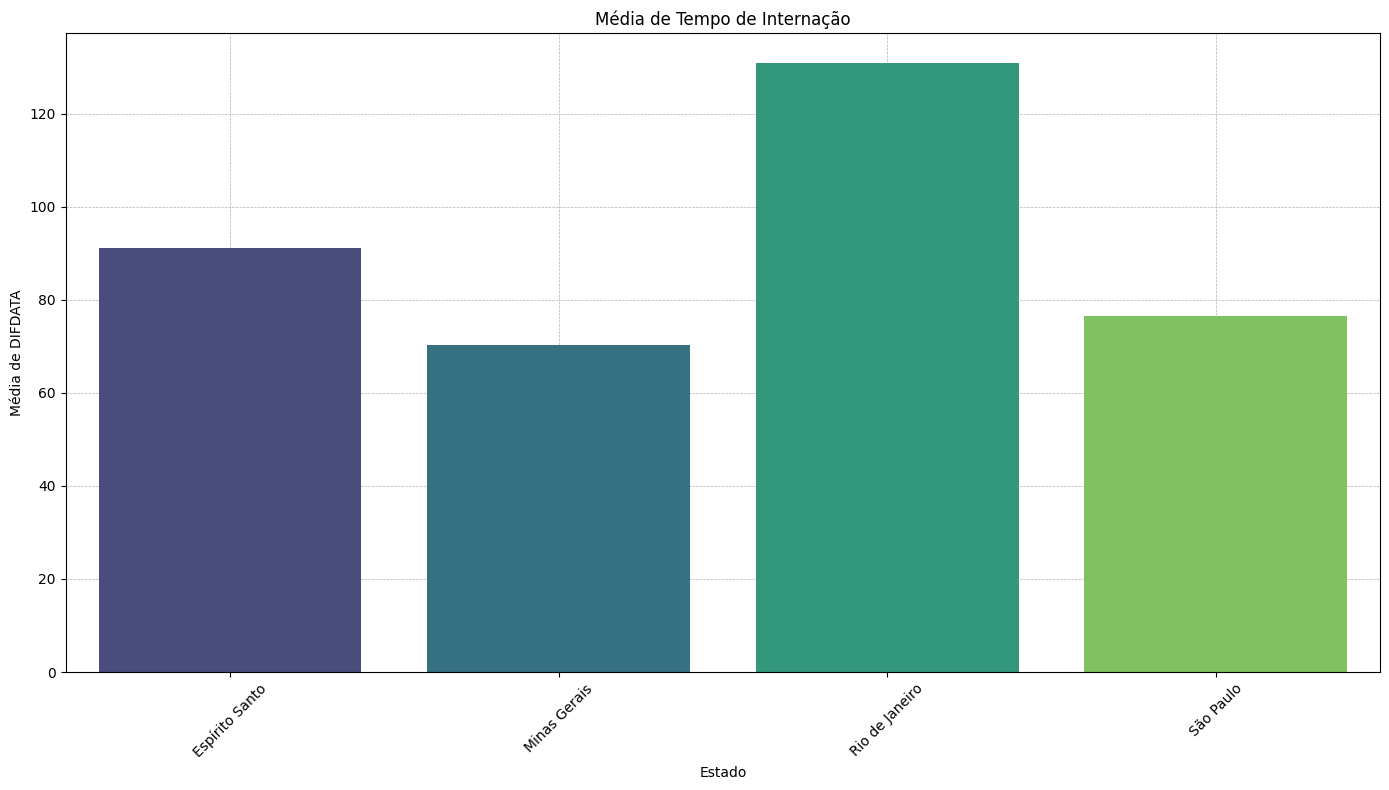

In [18]:
df['DIFDATA'] = pd.to_numeric(df['DIFDATA'], errors='coerce')
df = df.dropna(subset=['DIFDATA'])

mean_difdata_by_state = df.groupby('ESTADO')['DIFDATA'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='ESTADO', y='DIFDATA', data=mean_difdata_by_state, palette='viridis', zorder=2)

plt.title('Média de Tempo de Internação')
plt.xlabel('Estado')
plt.ylabel('Média de DIFDATA')

plt.xticks(rotation=45)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.show()

### **Conclusão**

Minas Gerais e São Paulo tiveram um tempo médio de internação menor do que os outros Estados, o que pode indicar correlação com a taxa de óbitos (são os dois que tiveram maior pico). Enquanto que o Rio de Janeiro mostra um tempo de internação médio maior do que os outros, o que também indica uma possibilidade de maior eficiência.

## **Q5.** Há relação entre o número de óbitos e a idade dos pacientes?

São Paulo e Minas Gerais tiveram um tempo de internação médio menor do que os outros Estados. Rio de Janeiro teve o maior tempo de internação.

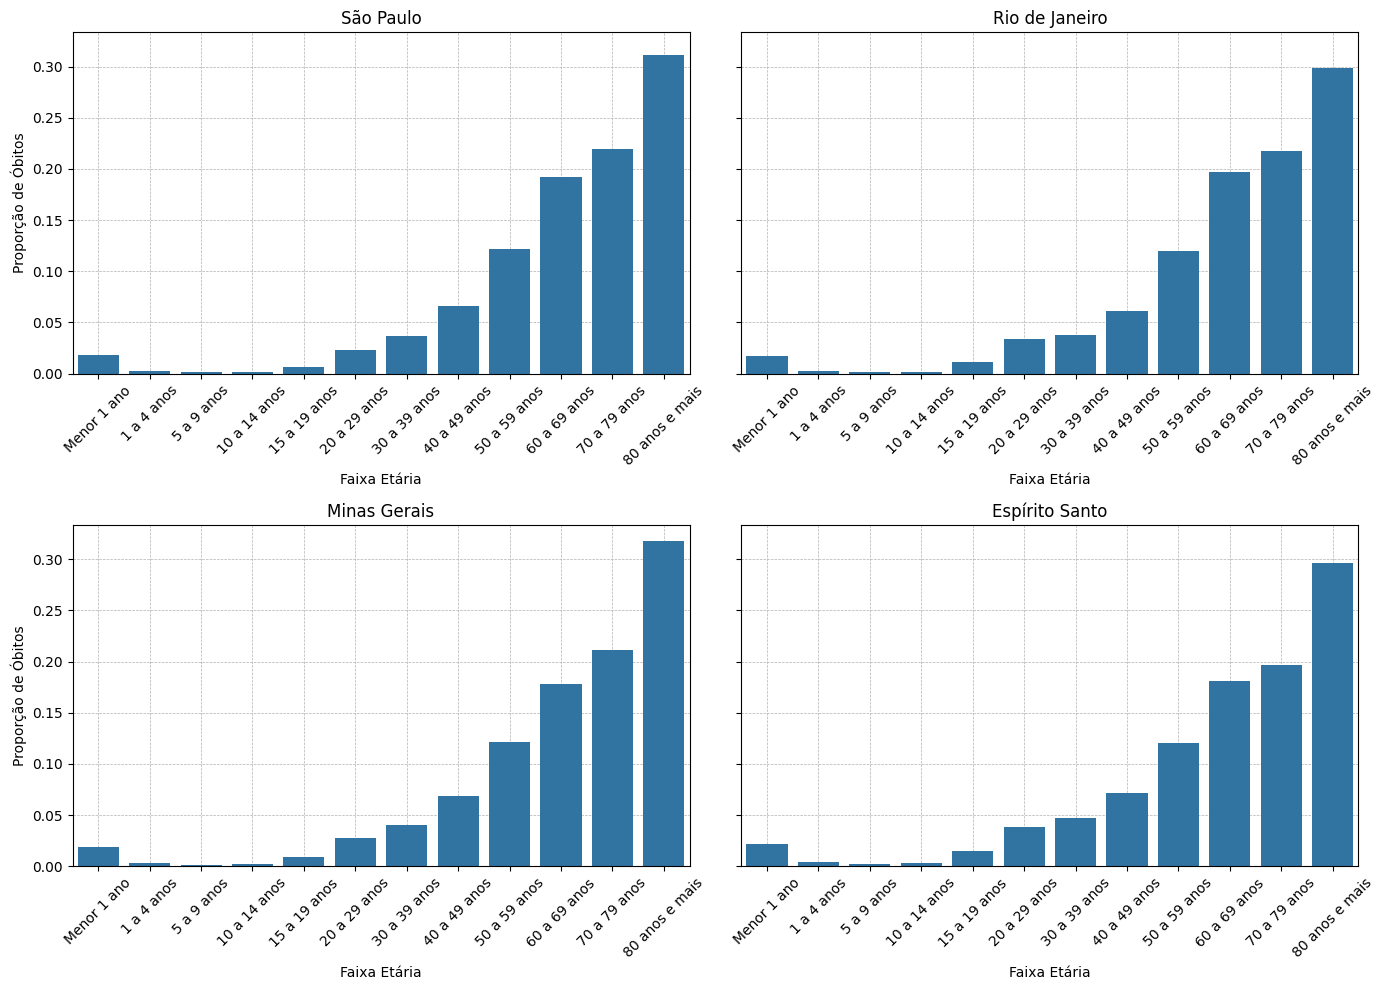

In [21]:
bins = [-1, 0, 4, 9, 14, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = [
    'Menor 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
    '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos',
    '70 a 79 anos', '80 anos e mais'
]

df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')

df = df.dropna(subset=['IDADE'])

df['faixa_etaria'] = pd.cut(df['IDADE'], bins=bins, labels=labels)

states_to_plot = df['ESTADO'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

axes = axes.flatten()

for i, estado in enumerate(states_to_plot):
    state_data = df[df['ESTADO'] == estado]
    faixa_etaria_counts = state_data['faixa_etaria'].value_counts().reindex(labels, fill_value=0).reset_index()
    faixa_etaria_counts.columns = ['faixa_etaria', 'count']
    faixa_etaria_counts['proportion'] = faixa_etaria_counts['count'] / faixa_etaria_counts['count'].sum()
    sns.barplot(ax=axes[i], x='faixa_etaria', y='proportion', data=faixa_etaria_counts, zorder=2)
    axes[i].set_title(estado)
    axes[i].set_xlabel('Faixa Etária')
    axes[i].set_ylabel('Proporção de Óbitos')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.show()


### **Conclusão**

Sim, podemos observar que pacientes muito jovens têm maior taxa de óbito e, também, a partir dos 14 anos, podemos perceber que quanto maior a idade dos pacientes maior a tendência a óbito.

# **Referências**

https://pysus.readthedocs.io/pt/latest/tutorials/Preprocessing%20SIM.html

https://pysus.readthedocs.io/pt/latest/databases/SIM.html

https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

# **Conclusão**
A análise dos dados de óbitos do SUS demonstrou o potencial e a importância da utilização de dados para a tomada de decisões que visam a melhora do sistema. Através da identificação de tendências, grupos mais afetados e padrões podemos evidenciar áreas de possível vulnerabilidade e risco, compreendendo melhor os problemas e oportunidades do Sistema Único de Saúde.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

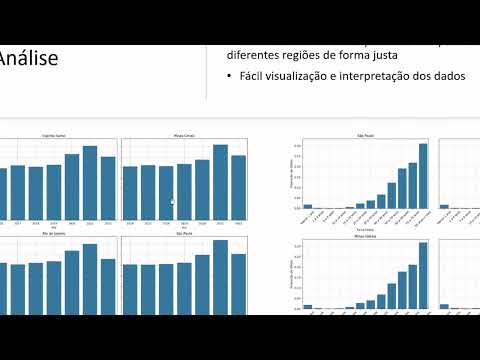

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('LhsBHgmbulQ') # substitua pelo seu vídeo

---

- [Github](https://github.com/ArthurWypych/ECM514_business_case/blob/main/)

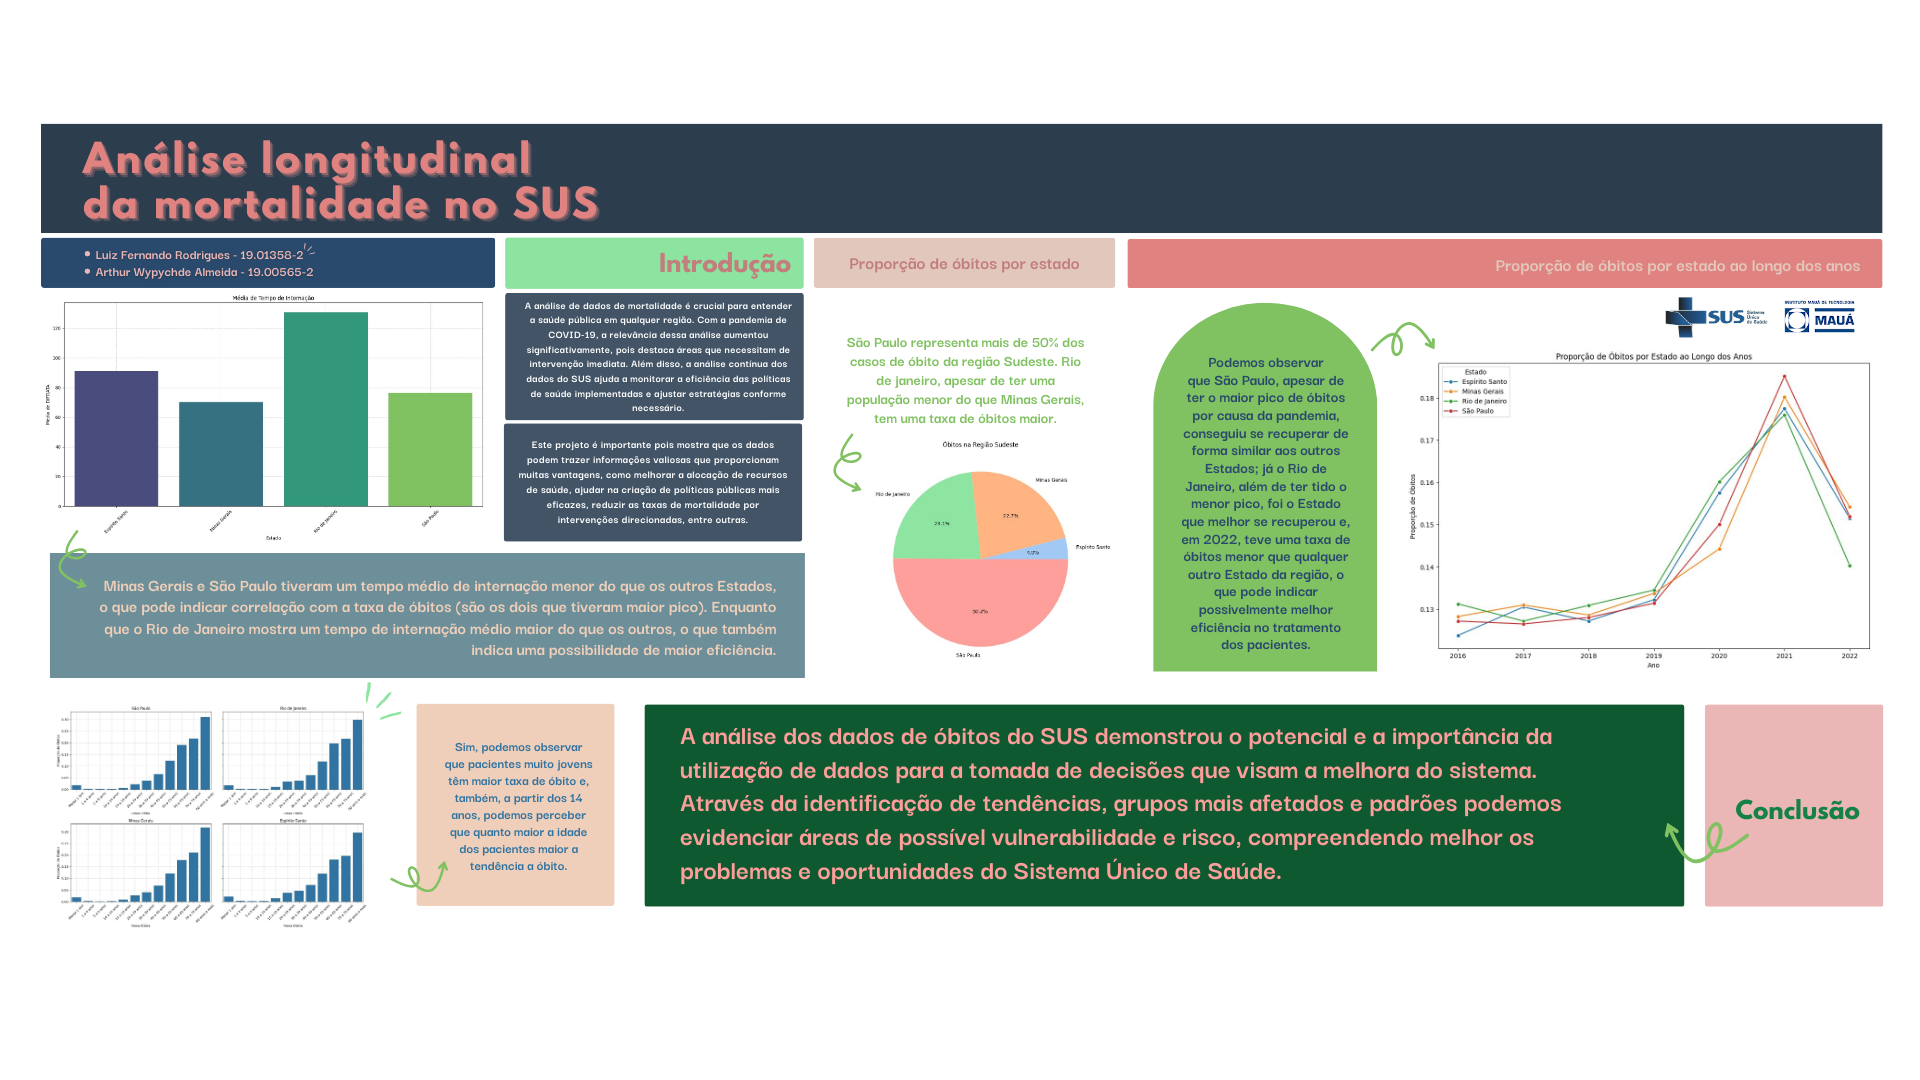

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 1 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 10 #@param {type:"slider", min:0, max:10, step:1}
Video = 10 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)